# Pandas

**Series**: es una matriz etiquetada **unidimensional** capaz de contener cualquier tipo de datos (enteros, cadenas, números de punto flotante, objetos de Python, etc.). Las etiquetas de los **ejes** (axis) se denominan colectivamente índice (index). El método básico para crear una serie es llamar a `pd.Series([1,3,5,np.nan,6,8])`.

**DataFrame**: Es una estructura de datos etiquetada **bidimensional** con columnas de tipos potencialmente diferentes. Se puede considerar como una hoja de cálculo o una tabla SQL, o un diccionario de objetos Series. Proviene del objeto `data.frame()` de `R`.

## Las Series

In [1]:
import pandas as pd
#pd.Series?

In [2]:
animales = ['Tigre', 'Oso', 'Alce']
pd.Series(animales)

0    Tigre
1      Oso
2     Alce
dtype: object

In [3]:
animales = ['Tigre', 'Oso', None]
pd.Series(animales)

0    Tigre
1      Oso
2     None
dtype: object

In [4]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [5]:
import numpy as np
np.nan == None

False

In [6]:
np.nan == np.nan

False

In [7]:
np.isnan(np.nan)

True

In [8]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports)
s

Futbol             Ecuador
Golf               Escocia
Sumo                 Japon
Taekwondo    Corea del Sur
dtype: object

In [9]:
s.index

Index(['Futbol', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

In [10]:
s = pd.Series(['Tigre', 'Oso', 'Alce'], index=['India', 'America', 'Canada'])
s

India      Tigre
America      Oso
Canada      Alce
dtype: object

In [11]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
s

Golf      Escocia
Sumo        Japon
Hockey        NaN
dtype: object

## Haciendo consultas en Series

In [12]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports)
s

Futbol             Ecuador
Golf               Escocia
Sumo                 Japon
Taekwondo    Corea del Sur
dtype: object

In [13]:
s.iloc[3]

'Corea del Sur'

In [14]:
s.loc['Golf']

'Escocia'

In [15]:
s[3]

'Corea del Sur'

In [16]:
s['Golf']

'Escocia'

In [17]:
sports = {99: 'Ecuador',
          100: 'Escocia',
          101: 'Japon',
          102: 'Corea del Sur'}
s = pd.Series(sports)

In [18]:
#  s[0] # no se hace la consulta

In [19]:
s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [20]:
total = 0
for item in s:
    total+=item
print(total)

324.0


In [21]:
s = pd.Series([1, 2, 3])
s.loc['Animal'] = 'Bears' # agregamos un elemento a la serie
s

0             1
1             2
2             3
Animal    Bears
dtype: object

## Pandas: estructuras de datos para estadística

Provee estructuras de datos adecuados para análisis estadístico, y añade funciones que  facilitan el ingreso de datos, su organización y su manipulación.

### Manipulación de datos

**Procedimientos comunes**

Un *DataFrame* es una estructura de datos de dos dimensiones con etiquetas cuyas columnas pueden ser de diferentes tipos. 

Empecemos creando un DataFrame con tres columnas *Time*, *x* y *y*

In [22]:
import numpy as np
import pandas as pd


In [23]:
t = np.arange(0,10,0.1)
x = np.sin(t)
y = np.cos(t)

In [24]:
df = pd.DataFrame({'Time':t, 'x':x,'y':y})

En *pandas* las filas se referencian por índices y las columnas por nombres. Si si desea la primera columna se tiene dos opciones:

In [25]:
df.Time
df['Time']

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: Time, Length: 100, dtype: float64

Si se desea extraer más de una columna, se lo hace con una lista:

In [26]:
data = df[['Time','x']]

Para despleguar las primeras o últimas filas tenemos:

In [27]:
data.head()
data.tail()

,Time,x
95,9.5,-0.075151
96,9.6,-0.174327
97,9.7,-0.271761
98,9.8,-0.366479
99,9.9,-0.457536


Para extraer las filas de la 5 a la 10 tenemos:

In [28]:
data[4:10]

,Time,x
4,0.4,0.389418
5,0.5,0.479426
6,0.6,0.564642
7,0.7,0.644218
8,0.8,0.717356
9,0.9,0.783327


El manejo de *DataFrames* es un tanto diferente de arrays en *numpy*. Por ejemplo, filas (enumeradas) y columnas (etiquetadas) se acceden de forma simultánea de la siguiente manera:

In [29]:
df[['Time','y']][4:10]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


También se puede usar la manera estándar de fila/columna usando `iloc`:

In [30]:
df.iloc[4:10,[0,2]]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


Finalmente, a veces se desea tener acceso directo a los datos, no al DataFrame, se usa:

In [31]:
# df.values

Lo que devuelve un *numpy array*

**Notas en Selección de datos**

Es cierto que *DataFrames* y *arrays* son parecidos, pero sus filosofías son diferentes. Es bueno tener muy claro sus diferencias para acceder a los datos:

- **numpy**: maneja *filas* primero. Ej., `data[0]` es la primera fila del array
- **pandas**: empieza con columnas. Ej., `df['values'][0]` es el primer elemento de la columna *values*.

Si un DataFrame tiene filas con etiquetas, puedes por ejemplo extraer la fila *rowlabel* con `df.loc['rowlabel']`. Si quieres acceder con el número de la fila, se hace con `df.iloc[15]`. También puedes usar `iloc` para acceder a datos en formato fila/columna `df.ioc[2:4,3]`

Extraer filas también funciona, por ejemplo `df[0:5]` para las primeras 5 filas. Lo que suele ser confuso es que para extraer una única fila se usa por ejmeplo `df[5:6]`. Si usas solo `df[5]` se devuelve un error. 

### Cargando nuestro primer conjunto de datos

> El conjunto de datos *Gapminder* viene originalmente de www.gapminder.org. La versión que exploraremos fue preparada por Jenifer Bryan de la Universidad de Columbia. Su repositorio puede encontrarse en https://github.com/jennybc/gapminder

Pandas tiene varias funciones de lectura de datos:

- `read_csv`
- `read_json`
- `read_excel`
- `read_spss`
- `read_stata`
- `...`

In [32]:
import pandas as pd
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/gapminder.csv"
df = pd.read_csv(uu)

Veamos algunos valores de la tabla:

- country: país
- continent: continente.
- year: año.
- lifeExp: esperanza de vida.
- pop: población.
- gdpPercap: producto interno bruto per cápita.


In [33]:
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [34]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Todo `DataFrame` tiene un atributo `shape` que nos devuelve el número de filas y columnas del `DataFrame` en forma de tupla.

In [35]:
print(df.shape)

(1704, 6)


Nota que no se usa paréntesis luego de `shape`. Esto se debe a que `shape` es un **atributo** del `DataFrame`, no un **método** donde si se requiere usar paréntesis. Te devolvería un error si agregaras un paréntesis.

Para ver el nombre de las columnas, usamos el atributo `columns`

In [36]:
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


Cada columna (Serie) tiene que ser  del mismo tipo, mientras que cada fila puede tener distintos tipos. 

Veamos los tipos de datos de las columnas de nuestros datos usando el atrbuto `dtypes`:

In [37]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


El tipo de dato `object` es el más flexible porque puede almacenar cualquier objeto de Python, incluidos cadenas de texto (`strings`), listas, diccionarios y objetos personalizados. El uso más común es para almacenar `strings`. Las operaciones con `object` podría ser más lento que con el tipo más específico, si se requiere hacer operaciones se recomienda cambiar el tipo de objecto al específico deseado (`string` ,`int` ,`float`,etc )

Para más detalle, usamos el método `info`.

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


### Columnas, filas y celdas

Para inspeccionar los datos del `DataFrame` podemos apalancarnos en métodos. Por ejemplo, `head` nos permite ver las primeras 5 filas de los datos

In [39]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


### Seleccionar e indexar columnas por nombre

Para acceder a columnas específicas de nuestros datos, podemos usar corchetes `[]`.

In [40]:
country_df = df['country']

In [41]:
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [42]:
country_df.tail()# muestra las últimas filas del df

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

Para acceder a varias columnas, dentro del primer corchete, le pasamos una lista de nombres

In [43]:
subset = df[['country', 'continent','year']]
print(subset)

          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]


Usando la notación con corchetes `[]`, **no se puede** pasar un número que indique la posición. Para ello usamos `.iloc[]`

In [44]:
df.iloc[5:10,[3,2]]

,lifeExp,year
5,38.438,1977
6,39.854,1982
7,40.822,1987
8,41.674,1992
9,41.763,1997


> Indica la diferencia en los tipos de objectos que se obtienen si se tiene:

- `df['country']`
- `df[['country']]`

### Usando notación "." para acceder a valores de columna

Para acceder a valores del `DataFrame` también puedes usar la notación "."

In [45]:
df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

**Advertencias**: Ten cuidado con el nombre de las columnas cuando vas a usar la notación punto.

- Si el nombre de la columna coincide con el nombre de un atributo (`shape` por ejemplo), entonces el atributo tiene jerarquía y te devolverá el atributo y no la columna.
- Si el nombre de la columna tiene espacios o caracteres especiales, no puedes usar la notación punto y solo puedes usar el acceso con corchetes.

### Subconjunto de filas

| Atributo | Descripción | 
|:--------:|:--------:|
|  `loc`   |  Subconjunto basado en la etiqueta del índice   |
|  `iloc`   |  Subconjunto basado en el número de la fila   |


Accedamos a los datos con la etiqueta del índice en nuestros datos

In [46]:
print(df.loc[0]) # nota que '0' no representa un número en este caso, sino la etiqueta de la fila

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


> Indica la diferencia entre
- `subset_loc = df.loc[0]`
- `subset_head = df.head(n=1)`

Podemos acceder a varias filas usando las etiquetas de fila:

In [47]:
print(df.loc[[0,30,451]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
30       Algeria    Africa  1982   61.368  20033753  5745.160213
451      Ecuador  Americas  1987   67.231   9545158  6481.776993


### Usando `.iloc`

`.iloc` hace lo mismo que `.loc` pero usando números que representan las posiciones de la fila. Solo recuerda a las etiquetas de fila pueden o no ser números.

In [48]:
print(df.iloc[1])# accedo a la segunda fila porque inicia en 0.

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


Con '.iloc' podemos usar el índice `-1` para acceder a la última fila (esto no es posible con `.loc`)

In [49]:
print(df.iloc[-1])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [50]:
print(df.iloc[[0,30,451]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
30       Algeria    Africa  1982   61.368  20033753  5745.160213
451      Ecuador  Americas  1987   67.231   9545158  6481.776993


### Agrupaciones

*pandas* ofrece funciones poderosas para manejar datos perdidos que suelen ser reemplazados por *nan* (*not a number*). También permite realizar manipilaciones más sofisticadas como *pivotaje*. Por ejemplo, se puede usar DataFrames para hacer grupos y su análisis estadístico de cada grupo. 

In [51]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Gender' : ['f', 'f', 'm', 'f', 'm','m', 'f', 'm', 'f', 'm', 'm'], 
    'TV': [3.4, 3.5, 2.6, 4.7, 4.1, 4.1, 5.1, 3.9, 3.7, 2.1, 4.3]
})

In [52]:
data

,Gender,TV
0,f,3.4
1,f,3.5
2,m,2.6
3,f,4.7
4,m,4.1
5,m,4.1
6,f,5.1
7,m,3.9
8,f,3.7
9,m,2.1


In [53]:
#Agrupamos los datos

grouped = data.groupby('Gender')
grouped.apply(print)

  Gender   TV
0      f  3.4
1      f  3.5
3      f  4.7
6      f  5.1
8      f  3.7
   Gender   TV
2       m  2.6
4       m  4.1
5       m  4.1
7       m  3.9
9       m  2.1
10      m  4.3


""


Nota que si imprimes `grouped` solo se imprime espacio de memoria. A partir de la agrupación podemos acceder a las columnas que devuleven objetos tipo Series.

In [54]:
# Algunas estadísticas generales
grouped.describe()

TV                                               
       count      mean       std  min    25%  50%  75%  max
Gender                                                     
f        5.0  4.080000  0.769415  3.4  3.500  3.7  4.7  5.1
m        6.0  3.516667  0.926103  2.1  2.925  4.0  4.1  4.3

Gender
f    Axes(0.125,0.11;0.775x0.77)
m    Axes(0.125,0.11;0.775x0.77)
dtype: object

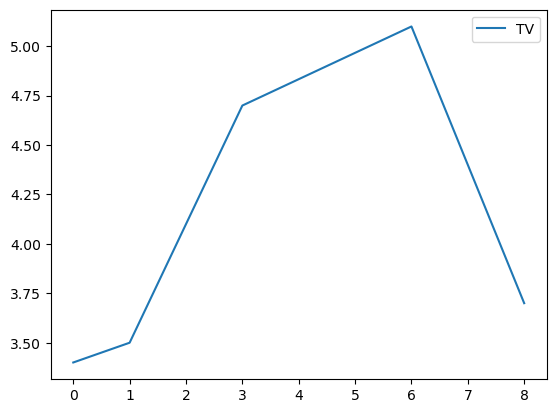

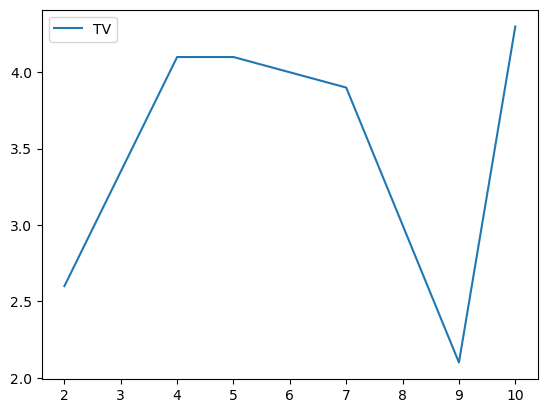

In [55]:
# Graficamos los datos
grouped.plot()

In [56]:
# Separamos los grupos como DataFrames
df_female = grouped.get_group('f')
df_female

,Gender,TV
0,f,3.4
1,f,3.5
3,f,4.7
6,f,5.1
8,f,3.7


In [57]:
# Obtenemos los datos como un numpy-array
values_female = df_female.values
values_female

array([['f', 3.4],
       ['f', 3.5],
       ['f', 4.7],
       ['f', 5.1],
       ['f', 3.7]], dtype=object)

Volviendo a nuestro ejemplo con los datos de **gapminder**.

Ejercicio: Agrupar por año y obtener la media de la variable esperanza de vida (`lifeExp`)

In [58]:
print(df.groupby("year")["lifeExp"].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


Ejercicio: Agrupar por año-continente y obtener la media de la variable esperanza de vida (`lifeExp`) y el PIB per cápita (`gdpPercap`).

In [59]:
multigrupo = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

In [60]:
multigrupo.head()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650

En ocasiones el código puede legar a ser largo, por lo que el uso de paréntesis nos sirve para escribirlo en varias líneas:

In [61]:
multigrupo = (df.
              groupby(['year','continent'])
              [['lifeExp','gdpPercap']].
              mean())

In [62]:
print(multigrupo.head())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650


Nota que `year` aparece una vez en la impresión. Si requieres tener un formato tabular (que se repita en cada fila, llamado `flatten`) puedes usar `reset_index`:

In [63]:
print(multigrupo.reset_index().head())

   year continent    lifeExp     gdpPercap
0  1952    Africa  39.135500   1252.572466
1  1952  Americas  53.279840   4079.062552
2  1952      Asia  46.314394   5195.484004
3  1952    Europe  64.408500   5661.057435
4  1952   Oceania  69.255000  10298.085650


Para **contar el número de casos** usamos `.value_counts()` y para el número de valores únicos usamos `.nunique()`

In [64]:
df.groupby('continent')['country'].value_counts()

continent  country    
Africa     Algeria        12
           Angola         12
           Libya          12
           Ghana          12
           Guinea         12
                          ..
Europe     Germany        12
           Greece         12
           Hungary        12
Oceania    Australia      12
           New Zealand    12
Name: count, Length: 142, dtype: int64

In [65]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### Wide & Long

Los datos *gapminder* que hemos analizado, están en un formato que se conoce como `long` o largo. Este tipo de formatos nos permite *pivotear*para obtener métricas de resumen de datos y agrupaciones (parecido a datos listos para usarse en una tabla dinámica de Excel). El resultado de las agrupaciones son datos en formato `wide`.

#### .pivot_table

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Devuelve un DataFrame reformado (*reshaped*) organizado por valores de índice/columna dados.

Ejercicio: Obtener la esperanza de vida `lifeExp` por cara año y país donde los continentes estén como columnas:

In [66]:
df_wide = df.pivot_table(
    index = ['year','country'],
    columns = 'continent',
    values = 'lifeExp'
).reset_index()
print(df_wide)

continent  year             country  Africa  Americas    Asia  Europe  Oceania
0          1952         Afghanistan     NaN       NaN  28.801     NaN      NaN
1          1952             Albania     NaN       NaN     NaN   55.23      NaN
2          1952             Algeria  43.077       NaN     NaN     NaN      NaN
3          1952              Angola  30.015       NaN     NaN     NaN      NaN
4          1952           Argentina     NaN    62.485     NaN     NaN      NaN
...         ...                 ...     ...       ...     ...     ...      ...
1699       2007             Vietnam     NaN       NaN  74.249     NaN      NaN
1700       2007  West Bank and Gaza     NaN       NaN  73.422     NaN      NaN
1701       2007         Yemen, Rep.     NaN       NaN  62.698     NaN      NaN
1702       2007              Zambia  42.384       NaN     NaN     NaN      NaN
1703       2007            Zimbabwe  43.487       NaN     NaN     NaN      NaN

[1704 rows x 7 columns]


#### .melt

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

Por otro lado, para volver de datos agrupados `wide` a un formato `long` tenemos:

In [67]:
df_long = df_wide.melt(id_vars = ['year','country'])
df_long.head()

,year,country,continent,value
0,1952,Afghanistan,Africa,NaN
1,1952,Albania,Africa,NaN
2,1952,Algeria,Africa,43.077
3,1952,Angola,Africa,30.015
4,1952,Argentina,Africa,NaN


Nota que `df_long` tiene valores perdidos y más registros (`shape`) que `df` porque hay valores `NaN`. 

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

Podemos borrarlos de la siguiente manera:

In [68]:
df_long.dropna(inplace = True)

In [69]:
df_long.head()

,year,country,continent,value
2,1952,Algeria,Africa,43.077
3,1952,Angola,Africa,30.015
10,1952,Benin,Africa,38.223
13,1952,Botswana,Africa,47.622
16,1952,Burkina Faso,Africa,31.975


> Ejercicio: obtener la mediana de la esperanza de vida y del PIB per cápita por continente y país (consejo: usa `.pivot_table`)

### Merge

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Para unir tablas se usa `merge`. Primero manejemos algunos atributos importantes de DataFrames:


In [70]:
import pandas as pd

df = pd.DataFrame([{'Nombre': 'Melani', 'Producto comprado': 'Esponja', 'Costo': 22.50},
                   {'Nombre': 'Carlos', 'Producto comprado': 'Arena para gatos', 'Costo': 2.50},
                   {'Nombre': 'Erica', 'Producto comprado': 'Cuchara', 'Costo': 5.00}],
                  index=['Tienda 1', 'Tienda 1', 'Tienda 2'])
df

,Nombre,Producto comprado,Costo
Tienda 1,Melani,Esponja,22.5
Tienda 1,Carlos,Arena para gatos,2.5
Tienda 2,Erica,Cuchara,5.0


Podemos agregar una columna al `DataFrame` creado usando `df['variable']=[]`

In [71]:
df['Fecha'] = ['Diciembre 1', 'Enero 1', 'mediado Mayo']
df

,Nombre,Producto comprado,Costo,Fecha
Tienda 1,Melani,Esponja,22.5,Diciembre 1
Tienda 1,Carlos,Arena para gatos,2.5,Enero 1
Tienda 2,Erica,Cuchara,5.0,mediado Mayo


Si asignamos un único valor, por ejemplo `df['variable']=10`, se asigna el mismo valor a toda la columna:

In [72]:
df['Entregado'] = True
df

,Nombre,Producto comprado,Costo,Fecha,Entregado
Tienda 1,Melani,Esponja,22.5,Diciembre 1,True
Tienda 1,Carlos,Arena para gatos,2.5,Enero 1,True
Tienda 2,Erica,Cuchara,5.0,mediado Mayo,True


Los valores perdidos se codifican como `None`:

In [73]:
df['CalificacionAtencion'] = ['Positive', None, 'Negative']
df

,Nombre,Producto comprado,Costo,Fecha,Entregado,CalificacionAtencion
Tienda 1,Melani,Esponja,22.5,Diciembre 1,True,Positive
Tienda 1,Carlos,Arena para gatos,2.5,Enero 1,True,None
Tienda 2,Erica,Cuchara,5.0,mediado Mayo,True,Negative


Usamos `reset_index()` para que las Tiendas ahora sean parte de las columnas y luego modificamos la columna fecha dejando un valor perdido en el índice `1`.

In [74]:
adf = df.reset_index()
adf['Fecha'] = pd.Series({0: 'Diciembre 1', 2: 'mediado Mayo'})
adf

,index,Nombre,Producto comprado,Costo,Fecha,Entregado,CalificacionAtencion
0,Tienda 1,Melani,Esponja,22.5,Diciembre 1,True,Positive
1,Tienda 1,Carlos,Arena para gatos,2.5,NaN,True,None
2,Tienda 2,Erica,Cuchara,5.0,mediado Mayo,True,Negative


Para ilustrar el uso de **merge** debemos crear dos `DataFrame`:

In [75]:
staff_df = pd.DataFrame([{'Nombre': 'Carolina', 'Role': 'Directora de RRHH'},
                         {'Nombre': 'Salomé', 'Role': 'Vinculación'},
                         {'Nombre': 'Jacinto', 'Role': 'Evaluador'}])
staff_df = staff_df.set_index('Nombre')
student_df = pd.DataFrame([{'Nombre': 'Jacinto', 'Carrera': 'Negocios'},
                           {'Nombre': 'Mauro', 'Carrera': 'Leyes'},
                           {'Nombre': 'Salomé', 'Carrera': 'Ingenieria'}])
student_df = student_df.set_index('Nombre')
print(staff_df.head())
print()
print(student_df.head())

                       Role
Nombre                     
Carolina  Directora de RRHH
Salomé          Vinculación
Jacinto           Evaluador

            Carrera
Nombre             
Jacinto    Negocios
Mauro         Leyes
Salomé   Ingenieria


**Tipos de *join***

<img src="images/im2.png" width="700" height="300">

In [76]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,Carrera
Nombre,,
Carolina,Directora de RRHH,NaN
Jacinto,Evaluador,Negocios
Mauro,NaN,Leyes
Salomé,Vinculación,Ingenieria


In [77]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,Carrera
Nombre,,
Salomé,Vinculación,Ingenieria
Jacinto,Evaluador,Negocios


In [78]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,Carrera
Nombre,,
Carolina,Directora de RRHH,NaN
Salomé,Vinculación,Ingenieria
Jacinto,Evaluador,Negocios


In [79]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,Carrera
Nombre,,
Jacinto,Evaluador,Negocios
Mauro,NaN,Leyes
Salomé,Vinculación,Ingenieria


In [80]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Nombre', right_on='Nombre')

,Nombre,Role,Carrera
0,Carolina,Directora de RRHH,NaN
1,Salomé,Vinculación,Ingenieria
2,Jacinto,Evaluador,Negocios


### Datos categóricos

In [81]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excelente', 'excelente', 'excelente', 'bueno', 'bueno', 'bueno', 'ok', 'ok', 'ok', 'bajo', 'bajo'])
df.head()

,0
excelente,A+
excelente,A
excelente,A-
bueno,B+
bueno,B


In [82]:
df.rename(columns={0: 'Notas'}, inplace=True) #cambia el nombre de "0" a "Notas"
df

,Notas
excelente,A+
excelente,A
excelente,A-
bueno,B+
bueno,B
bueno,B-
ok,C+
ok,C
ok,C-
bajo,D+


In [83]:
df['Notas'].astype('category').head()

excelente    A+
excelente     A
excelente    A-
bueno        B+
bueno         B
Name: Notas, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

In [84]:
notas = pd.Categorical(df.Notas, categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                              ordered=True)
notas

['A+', 'A', 'A-', 'B+', 'B', ..., 'C+', 'C', 'C-', 'D+', 'D']
Length: 11
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [85]:
notas > 'C'

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False])

In [86]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/SpatialData/VABNoPetroleroCantones2007-2019.csv"
df = pd.read_csv(uu)
df.head()

,NOM_PROV,COD_PROV,NOM_CANT,COD_CANT,PRODUCCION,CONSUMO_INTERMEDIO,VAB,YEAR,TIPO
0,AZUAY,1,Cuenca,101,3.934100e+06,1.829345e+06,2.104755e+06,2007,Definitivo
1,AZUAY,1,Girón,102,4.362436e+04,1.811613e+04,2.550823e+04,2007,Definitivo
2,AZUAY,1,Gualaceo,103,1.451126e+05,5.875048e+04,8.636215e+04,2007,Definitivo
3,AZUAY,1,Nabón,104,5.595320e+04,2.387684e+04,3.207636e+04,2007,Definitivo
4,AZUAY,1,Paute,105,1.191381e+05,5.077103e+04,6.836707e+04,2007,Definitivo


In [87]:
df = df[df['YEAR']==2019]
df = df.set_index('NOM_CANT').groupby(level=0)['VAB'].agg([np.average]).rename(columns={'average': 'avg'})
df.head()
df.describe()

,avg
count,2.190000e+02
mean,4.304939e+05
std,2.286327e+06
min,4.037812e+03
25%,2.730949e+04
50%,6.001888e+04
75%,1.902939e+05
max,2.503261e+07


Para agrupar valores en intervalos discretos usamos [`pd.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html):

In [88]:
pd.cut(df['avg'],10)

NOM_CANT
24 De Mayo                  (-20990.756, 2506894.639]
Aguarico                    (-20990.756, 2506894.639]
Alausí                      (-20990.756, 2506894.639]
Alfredo Baquerizo Moreno    (-20990.756, 2506894.639]
Ambato                      (-20990.756, 2506894.639]
                                      ...            
Yaguachi                    (-20990.756, 2506894.639]
Yanzatza                    (-20990.756, 2506894.639]
Zamora                      (-20990.756, 2506894.639]
Zapotillo                   (-20990.756, 2506894.639]
Zaruma                      (-20990.756, 2506894.639]
Name: avg, Length: 219, dtype: category
Categories (10, interval[float64, right]): [(-20990.756, 2506894.639] < (2506894.639, 5009751.466] < (5009751.466, 7512608.293] < (7512608.293, 10015465.12] ... (15021178.774, 17524035.601] < (17524035.601, 20026892.428] < (20026892.428, 22529749.255] < (22529749.255, 25032606.081]]

### Tablas dinámicas

In [89]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/cars.csv"
df = pd.read_csv(uu)

In [90]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [91]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [92]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

### Apply

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html


Cuando trabajas con DataFrames es posible que requieras aplicar funciones en filas o columnas. 

In [93]:
df = pd.DataFrame({"a": [2,4,6],"b": [2,3,5]})
print(df)

   a  b
0  2  2
1  4  3
2  6  5


Creamos una función simple llamada `cuad` que eleva los valores ingresados al cuadrado:

In [94]:
def cuad(x):
    sol = x**2
    return(sol)

Aplicamos la función creada en la columna `a` del DataFrame

In [95]:
df['a'].apply(cuad)

0     4
1    16
2    36
Name: a, dtype: int64

Ahora creamos una función que tenga dos parámetros:

In [96]:
def cuad_e(x,e):
    sol = x**e
    return(sol)

In [97]:
df['a'].apply(cuad_e,e = 3)

0      8
1     64
2    216
Name: a, dtype: int64

Nota que al aplicar las funciones anteriores estábamos trabajando sobre objetos tipo `Series`. 

Si queremos aplicar una función sobre varias columnas del DataFrame, usamos el parámetro `axis=0` para aplicar la función por cada columna:

In [98]:
df.apply(cuad,axis = 0)

,a,b
0,4,4
1,16,9
2,36,25


De manera similar, si queremos aplicar una función sobre varias filas del DataFrame, usamos el parámetro `axis=1` para aplicar la función por cada fila:

In [99]:
df.apply(cuad_e,axis = 0,e = 2)

,a,b
0,4,4
1,16,9
2,36,25


In [100]:
df['a'].apply(lambda x: x**2)

0     4
1    16
2    36
Name: a, dtype: int64

A veces la función que deseamos aplicar no es tan compleja tal que no requiere que la creemos por separado. En este caso podemos usar `lambda`.

In [101]:
df['a'].apply(lambda x: np.sqrt(x)-3)

0   -1.585786
1   -1.000000
2   -0.550510
Name: a, dtype: float64

#### .concat

> Documentación pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html


La concatenación nos permite concatenar filas o columnas de diferentes conjuntos de datos.

In [102]:
df1 = pd.DataFrame({'A': ['a0','a1','a2','a3'],
                   'B': ['b0','b1','b2','b3'],
                   'C': ['c0','c1','c2','c3'],
                   'D': ['d0','d1','d2','d3']})
print(df1)

df2 = pd.DataFrame({'A': ['a4','a5','a7','a7'],
                   'B': ['b4','b5','b6','b7'],
                   'C': ['c4','c5','c6','c7'],
                   'D': ['d4','d5','d6','d7']})

print(df2)
df3 = pd.DataFrame({'A': ['a8','a9','a10','a11'],
                   'B': ['b8','b9','b10','b11'],
                   'C': ['c8','c9','c10','c11'],
                   'D': ['d8','d9','d10','d11']})
print(df3)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
    A   B   C   D
0  a4  b4  c4  d4
1  a5  b5  c5  d5
2  a7  b6  c6  d6
3  a7  b7  c7  d7
     A    B    C    D
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


El `index` del DataFrame es un `axis` del DataFrame. Pandas tratará de alinear los datos por `axis`. El otro `axis` del DataFrame es `columns`.

In [103]:
df1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [104]:
df1.index

RangeIndex(start=0, stop=4, step=1)

In [105]:
df1.values# representa el cuerpo del dataframe como array

array([['a0', 'b0', 'c0', 'd0'],
       ['a1', 'b1', 'c1', 'd1'],
       ['a2', 'b2', 'c2', 'd2'],
       ['a3', 'b3', 'c3', 'd3']], dtype=object)

Para concatenar por filas:

In [106]:
row_concat = pd.concat([df1,df2,df3])
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a7   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


Nota que el índice del DataFrame concatenado se repite. 

> Usa `.loc[]` para indexar valores del DataFrame

Ahora creamos una nueva fila de datos que deseamos agregar al DataFrame:


In [107]:
new_row_series = pd.Series(['a12','b12','c12','d12'])
print(pd.concat([df1,new_row_series]))

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN  a12
1  NaN  NaN  NaN  NaN  b12
2  NaN  NaN  NaN  NaN  c12
3  NaN  NaN  NaN  NaN  d12


Nota que no se obtuvo el resultado deseado y se obtuvo una columna extra. 

Para arreglar este problema, convertimos esta serie tipo fila en un DataFrame: 

In [108]:
new_row_df = pd.DataFrame(
    # nota el doble corchete para crear datos tipo fila
    data = [['a12','b12','c12','d12']],
    columns = ["A","B","C","D"]
)
new_row_df

,A,B,C,D
0,a12,b12,c12,d12


In [109]:
pd.concat([df1,new_row_df])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a12,b12,c12,d12


Para **concatenar por columnas**, usamos `axis = 'columns'`

In [110]:
col_concat = pd.concat([df1,df2,df3],axis = 'columns')
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a7  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [111]:
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a7  a10
3  a3  a7  a11
